In [2]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import csv

In [3]:
# Generate the data

s = np.random.poisson(7, 13500)
s

array([4, 9, 9, ..., 7, 9, 9])

In [4]:
# Print the first second of the test, last second of the test, and maximum amount of concurrent users in the test

print(min(s), max(s))
unique, counts = np.unique(s, return_counts=True)
print(max(counts))

0 19
2043


In [5]:
# Multiply each data with a coefficient to make the test span for 10 minutes

multiplier_coefficient = 600/max(s)
multiplied = s * multiplier_coefficient

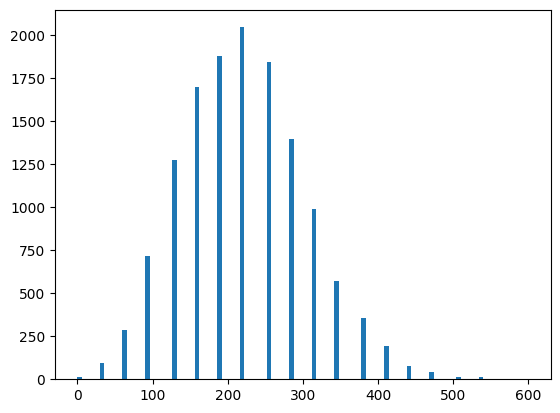

In [6]:
# Visualize the current data

count, bins, ignored = plt.hist(multiplied, 100)
plt.show()

In [7]:
# Get the x (seconds) and y axis (frequency)
unique, counts = np.unique(multiplied, return_counts=True)

In [8]:
# Extract the data into a dictionary

multiplied_dict = dict(zip(unique, counts))
multiplied_dict

{0.0: 12,
 31.57894736842105: 92,
 63.1578947368421: 287,
 94.73684210526315: 718,
 126.3157894736842: 1274,
 157.89473684210526: 1699,
 189.4736842105263: 1879,
 221.05263157894737: 2043,
 252.6315789473684: 1840,
 284.2105263157895: 1396,
 315.7894736842105: 989,
 347.36842105263156: 573,
 378.9473684210526: 353,
 410.52631578947364: 194,
 442.10526315789474: 77,
 473.6842105263158: 45,
 505.2631578947368: 14,
 536.8421052631579: 13,
 568.421052631579: 1,
 600.0: 1}

In [9]:
# Interpolate the data to make it continuous

interp_func = UnivariateSpline(unique, counts)
newarr = interp_func(np.arange(0, 600, 1))
newarr

array([ 1.20126646e+01,  1.46189992e+01,  1.71637966e+01,  1.96528188e+01,
        2.20918280e+01,  2.44865862e+01,  2.68428557e+01,  2.91663984e+01,
        3.14629767e+01,  3.37383524e+01,  3.59982879e+01,  3.82485452e+01,
        4.04948864e+01,  4.27430736e+01,  4.49988690e+01,  4.72680346e+01,
        4.95563327e+01,  5.18695253e+01,  5.42133746e+01,  5.65936426e+01,
        5.90160914e+01,  6.14864833e+01,  6.40105803e+01,  6.65941446e+01,
        6.92429382e+01,  7.19627232e+01,  7.47592619e+01,  7.76383163e+01,
        8.06056486e+01,  8.36670208e+01,  8.68281951e+01,  9.00949336e+01,
        9.34729984e+01,  9.69681516e+01,  1.00586155e+02,  1.04332772e+02,
        1.08213763e+02,  1.12234891e+02,  1.16401919e+02,  1.20720607e+02,
        1.25196719e+02,  1.29836016e+02,  1.34644260e+02,  1.39627215e+02,
        1.44790641e+02,  1.50140301e+02,  1.55681956e+02,  1.61421370e+02,
        1.67364305e+02,  1.73516521e+02,  1.79883782e+02,  1.86471850e+02,
        1.93286486e+02,  

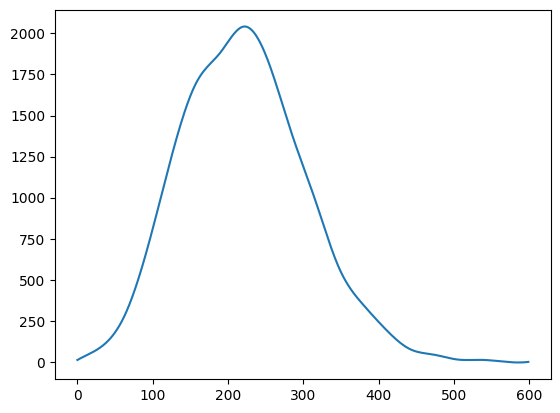

In [10]:
# Visualize the current data

plt.plot(np.arange(0,600,1), newarr)
plt.show()

In [11]:
# Ceil the data to make it integer

new_arr_ceiled = np.ceil(newarr).astype(int)
new_arr_ceiled

array([  13,   15,   18,   20,   23,   25,   27,   30,   32,   34,   36,
         39,   41,   43,   45,   48,   50,   52,   55,   57,   60,   62,
         65,   67,   70,   72,   75,   78,   81,   84,   87,   91,   94,
         97,  101,  105,  109,  113,  117,  121,  126,  130,  135,  140,
        145,  151,  156,  162,  168,  174,  180,  187,  194,  201,  208,
        216,  223,  231,  240,  248,  257,  266,  276,  285,  295,  306,
        316,  327,  338,  350,  361,  373,  385,  398,  410,  423,  436,
        450,  463,  477,  491,  506,  520,  535,  550,  565,  580,  595,
        611,  627,  643,  659,  675,  691,  708,  725,  741,  758,  775,
        793,  810,  827,  845,  862,  880,  897,  915,  933,  951,  969,
        986, 1004, 1022, 1040, 1058, 1075, 1093, 1111, 1129, 1146, 1164,
       1181, 1199, 1216, 1233, 1250, 1267, 1284, 1301, 1317, 1334, 1350,
       1366, 1382, 1398, 1414, 1429, 1444, 1459, 1474, 1488, 1503, 1517,
       1530, 1544, 1557, 1570, 1583, 1595, 1607, 16

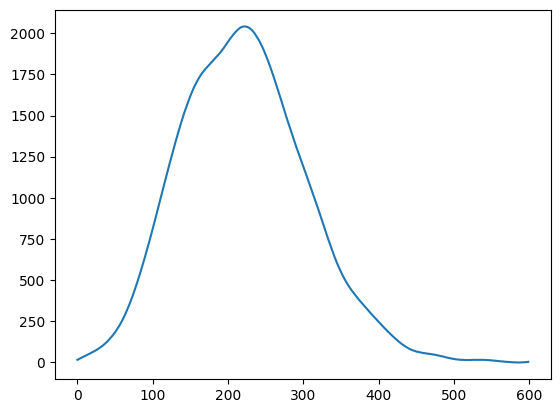

In [12]:
# Visualize the current data

plt.plot(np.arange(0,600,1), new_arr_ceiled)
plt.show()

In [13]:
x_axis = np.arange(0,600,1)
y_axis = new_arr_ceiled
finished_data = dict(zip(x_axis, y_axis))

In [14]:
# Export the data to a CSV file

OUTPUT_NAME = 'output.csv'
with open(OUTPUT_NAME, 'w', newline='') as file:
    writer = csv.writer(file)

    writer.writerow(['duration', 'users'])

    for i in range(len(x_axis)):
        writer.writerow([x_axis[i], y_axis[i]])